In [25]:
import pandas as pd
import numpy as np

%matplotlib inline

In [26]:
train = pd.read_csv("train.csv")

In [27]:
test = pd.read_csv("test.csv")

In [28]:
y_train = train["label"]

In [29]:
x_train = train.drop(labels = ["label"], axis=1)

In [30]:
del train

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

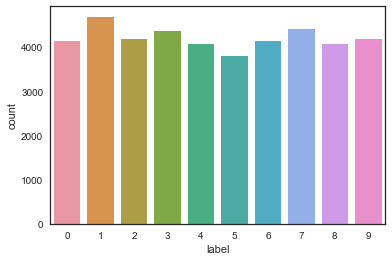

In [31]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
g=sns.countplot(y_train)
y_train.value_counts()

In [32]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [33]:
y_train.isnull().any()

False

In [34]:
x_train = x_train/255.0

In [35]:
test = test/255.0

In [36]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [37]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [38]:
random_seed = 2

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

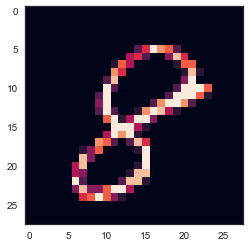

In [40]:
import matplotlib.pyplot as plt
g = plt.imshow(x_train[0][:,:,0])

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential()

In [42]:
model.add(Conv2D(filters=32, kernel_size = (5,5), padding='same', activation='relu', input_shape = (28,28,1)))

In [43]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

In [44]:
model.add(MaxPool2D(pool_size=(2,2)))

In [45]:
model.add(Dropout(0.25))

In [46]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

In [47]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [51]:
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [52]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [53]:
epochs = 15
batch_size = 86

In [54]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False) 



In [55]:
datagen.fit(x_train)

In [56]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/15
 - 300s - loss: 0.4430 - acc: 0.8572 - val_loss: 0.0841 - val_acc: 0.9717
Epoch 2/15
 - 301s - loss: 0.1622 - acc: 0.9515 - val_loss: 0.0483 - val_acc: 0.9857
Epoch 3/15
 - 300s - loss: 0.1228 - acc: 0.9626 - val_loss: 0.0388 - val_acc: 0.9895
Epoch 4/15
 - 301s - loss: 0.1005 - acc: 0.9693 - val_loss: 0.0377 - val_acc: 0.9895
Epoch 5/15
 - 300s - loss: 0.0978 - acc: 0.9715 - val_loss: 0.0378 - val_acc: 0.9900
Epoch 6/15
 - 342s - loss: 0.0863 - acc: 0.9746 - val_loss: 0.0345 - val_acc: 0.9893
Epoch 7/15
 - 342s - loss: 0.0821 - acc: 0.9760 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 8/15
 - 301s - loss: 0.0822 - acc: 0.9758 - val_loss: 0.0304 - val_acc: 0.9914
Epoch 9/15
 - 299s - loss: 0.0768 - acc: 0.9771 - val_loss: 0.0254 - val_acc: 0.9929
Epoch 10/15
 - 299s - loss: 0.0762 - acc: 0.9776 - val_loss: 0.0274 - val_acc: 0.9907
Epoch 11/15
 - 299s - loss: 0.0768 - acc: 0.9782 - val_loss: 0.0354 - val_acc: 0.9900
Epoch 12/15
 - 299s - loss: 0.0722 - acc: 0.9788 - val_loss: 0.

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

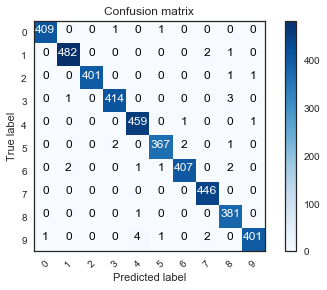

In [64]:
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

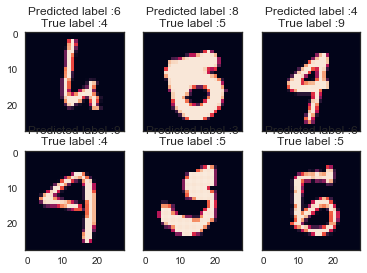

In [65]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, x_val_errors, y_pred_classes_errors, y_true_errors)


In [66]:
results = model.predict(test)
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [67]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)